# Домашняя работа №7.

* Написать модель Random Forest на датасет больных сердечными болезнями (можно почистить от выбросов).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
import researchpy as rp

In [2]:
url = "http://yustiks.ru/dataset/cardio_train.csv"
dataset = pd.read_csv(url,sep=";")
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Data description
There are 3 types of input features:

Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.
Features:

Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
All of the dataset values were collected at the moment of medical examination.

Данный датасет разобран в начале лекции 5. 

Модель Random Forest при обучении дает такой метод как feature importance, используя его, можно оценить, какой параметр **максимально** влияет на болезнь.

* Сделать вывод о том, какой атрибут оказывает значительное влияение на наличие или отсутствие болезни.

Основная задача: определить, что влияет на сердечную болезнь больше всего. Например, выдвигая гипотезу о том, что тот кто курит, болеет чаще, мы сравниваем курящих пациентов с некурящими, и определяя насколько статистически значимы выборки, делаем вывод, что одна выборка статистически отличима от другой (или неотличима).
    Выдвигаем гипотезу на самый важный атрибут, полученный из feature_importance (Random_Forest). И оцениваем гипотезу. И делаем вывод.

In [6]:
data = dataset.iloc[:,1:12]
headers = list(data.columns.values)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
np_scaled = min_max_scaler.fit_transform(data)
df_norm = pd.DataFrame(np_scaled)
df_norm.columns = headers
df_norm.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.588076,1.0,0.579487,0.273684,0.016079,0.013550,0.0,0.0,0.0,0.0,1.0
1,0.730159,0.0,0.517949,0.394737,0.017934,0.014453,1.0,0.0,0.0,0.0,1.0
2,0.624003,0.0,0.564103,0.284211,0.017316,0.012647,1.0,0.0,0.0,0.0,0.0
3,0.528455,1.0,0.584615,0.378947,0.018553,0.015357,0.0,0.0,0.0,0.0,1.0
4,0.516918,0.0,0.517949,0.242105,0.015461,0.011743,0.0,0.0,0.0,0.0,0.0


In [7]:
x = df_norm
y = dataset['cardio']

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [9]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
importances = model.feature_importances_ #применение метода feature importance 

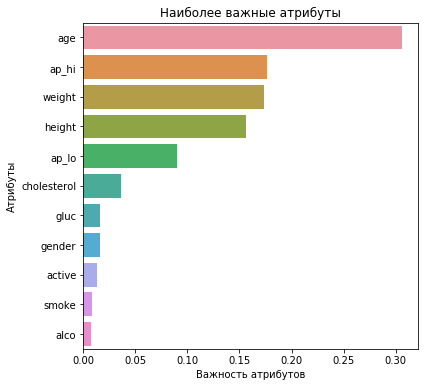

In [11]:
headers = list(x_train.columns.values)
feature_imp = pd.Series(importances,index=headers).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

In [12]:
indices = np.argsort(importances)[::-1] # сохранение номера колонки в порядке importances
for index in range(x.shape[1]):
    print("%d. %s: %f" % (index + 1, x.columns[indices[index]], importances[indices[index]]))

1. age: 0.306314
2. ap_hi: 0.176280
3. weight: 0.173763
4. height: 0.156025
5. ap_lo: 0.089585
6. cholesterol: 0.036519
7. gluc: 0.016169
8. gender: 0.015972
9. active: 0.013470
10. smoke: 0.008565
11. alco: 0.007338


In [13]:
model_pred = model.predict(x_test)
print(classification_report(y_test, model_pred))
model.score(x_test, y_test)

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



0.7173571428571428

In [14]:
#проверим гипотезу, что люди старше 50 лет(age), чаще болеют
young = dataset[dataset['age'] <= 18500].cardio
old = dataset[dataset['age'] > 18500].cardio
descriptives, results = rp.ttest(young, old)
print(descriptives)
print('____________')
print(results)

   Variable        N      Mean        SD       SE  95% Conf.  Interval
0    cardio  24434.0  0.370631  0.482984  0.00309   0.364575  0.376687
1    cardio  45566.0  0.568911  0.495234  0.00232   0.564364  0.573458
2  combined  70000.0  0.499700  0.500003  0.00189   0.495996  0.503404
____________
                Independent t-test     results
0  Difference (cardio - cardio) =      -0.1983
1            Degrees of freedom =   69998.0000
2                             t =     -50.9299
3         Two side test p value =       0.0000
4        Difference < 0 p value =       0.0000
5        Difference > 0 p value =       1.0000
6                     Cohen's d =      -0.4038
7                     Hedge's g =      -0.4038
8                 Glass's delta =      -0.4105
9                             r =       0.1890


In [15]:
from scipy import stats
stats.ttest_ind(young, old)

Ttest_indResult(statistic=-50.929860879392116, pvalue=0.0)

In [16]:
#проверим гипотезу, что люди с систолическим артериальным давление(ap_hi) более 130 чаще болеют
low = dataset[dataset['ap_hi'] <= 130].cardio
high = dataset[dataset['ap_hi'] > 130].cardio
descriptives, results = rp.ttest(low, high)
print(descriptives)
print('____________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0    cardio  50287.0  0.368167  0.482312  0.002151   0.363951  0.372382
1    cardio  19713.0  0.835236  0.370977  0.002642   0.830057  0.840415
2  combined  70000.0  0.499700  0.500003  0.001890   0.495996  0.503404
____________
                Independent t-test     results
0  Difference (cardio - cardio) =      -0.4671
1            Degrees of freedom =   69998.0000
2                             t =    -122.5005
3         Two side test p value =       0.0000
4        Difference < 0 p value =       0.0000
5        Difference > 0 p value =       1.0000
6                     Cohen's d =      -1.0294
7                     Hedge's g =      -1.0294
8                 Glass's delta =      -0.9684
9                             r =       0.4202


In [17]:
from scipy import stats
stats.ttest_ind(low, high)

Ttest_indResult(statistic=-122.50049599875878, pvalue=0.0)

Вывод:

Я провел проверку двух гипотез, первая - что с возрастом(age) количество сердечно-сосудистых заболеваний увеличивается, вторая - что с увеличением систолического артериального давление(ap_hi) количество сердечно-сосудистых заболеваний также увеличивается. В обоих случаях было получено pvalue < 0.01. Это значит, что между выбранными нами критериями есть отличия, т.е. люди с возрастом и с высоким систолическим артериальным давлением чаще болеют